In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


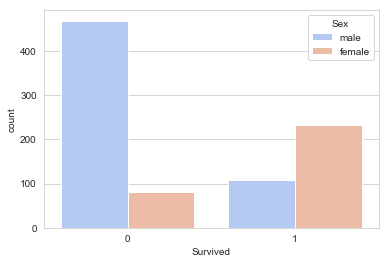

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, palette="coolwarm", hue="Sex")

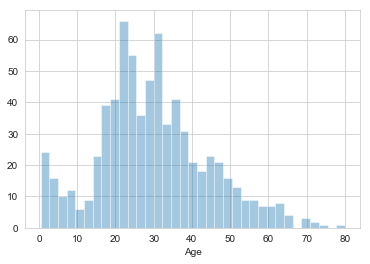

In [11]:
sns.distplot(train["Age"].dropna(), kde=False, bins=35)

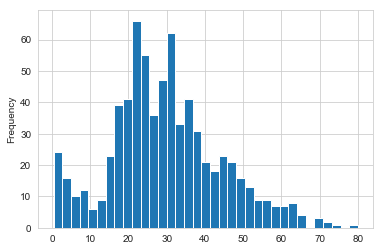

In [10]:
train["Age"].plot.hist(bins=35)

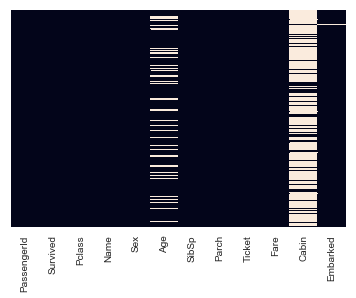

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

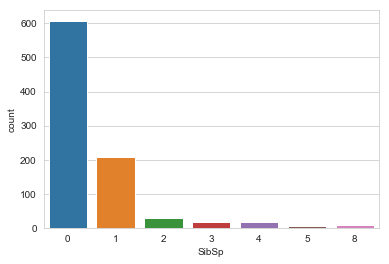

In [12]:
sns.countplot(x="SibSp", data=train)

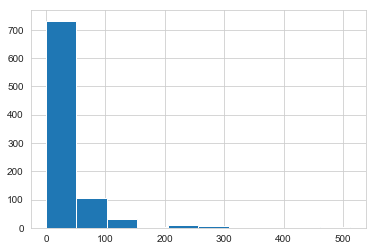

In [13]:
train["Fare"].hist()

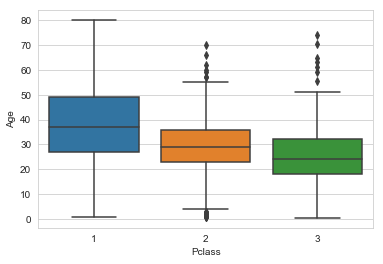

In [18]:
sns.boxplot(x="Pclass", y="Age", data=train)

In [20]:
def impute_age(cols):
    Age = cols [0]
    Pclass = cols[1]
        
    if pd.isnull(Age):
            
        if Pclass == 1:
             return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
train["Age"]= train[["Age", 'Pclass']].apply(impute_age, axis=1)

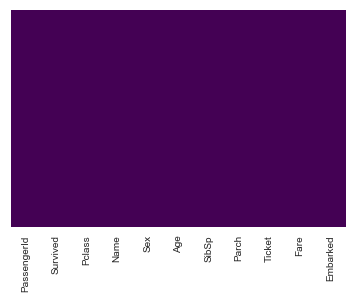

In [38]:
sns.heatmap(train.isnull() , cbar=False, yticklabels=False, cmap="viridis" )

In [34]:
train.drop('Cabin', axis=1, inplace=True)

In [37]:
train.dropna(inplace=True)

In [42]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [43]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [45]:
train = pd.concat([train,sex,embark], axis=1)

In [50]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
train.drop(['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

Machine Learning

In [51]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()

In [57]:
logmodel.fit(X_train, y_train)

C:\Users\Nisrina Puspita Sari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)